In [113]:
from base_path_cost_evaluator import *
import numpy as np
import time
import matplotlib.pyplot as plt

In [114]:
def smoothness(array):
    if len(array) < 3:
        return 0
    # First order difference
    derivative = np.diff(array, axis=0)
    # Standard deviation of the first order difference
    std = np.std(derivative, axis=0)
    # Mean of the standard deviation
    smoothness = np.mean(std)
    return smoothness ** 2

In [115]:
class PathCostEvaluator(BasePathCostEvaluator):

    # @pose_cost(1)
    # def pose_cost(self, pose):
    #     # time.sleep(0.1)
    #     return np.linalg.norm(pose)
    
    @cube_path_cost(100)
    def pose_path_cost(self, pose_path):
        # time.sleep(0.1)
        # return smoothness(pose_path)
        # converted = np.array(list(pose_path))
        # return smoothness(pose_path)
        # return np.mean(np.linalg.norm(np.diff(pose_path, axis=0), axis=1))
        # print(pose_path)
        # return 0
        return smoothness(pose_path)
    
    # @path_cost(1)
    # def path_cost(self, path):
    #     print(path)
    #     return 0



In [116]:
b = PathCostEvaluator(None, None)

In [117]:
path = np.linspace(0, 29, 30)
path = np.sin(path * 0.3)
patha = np.vstack((path, path)).T

pathb = np.linspace(0, 29, 30)
pathb = np.vstack((path, path, path)).T



In [118]:
actual_path = list(zip(patha, pathb))

In [119]:
print(actual_path)

[(array([0., 0.]), array([0., 0., 0.])), (array([0.29552021, 0.29552021]), array([0.29552021, 0.29552021, 0.29552021])), (array([0.56464247, 0.56464247]), array([0.56464247, 0.56464247, 0.56464247])), (array([0.78332691, 0.78332691]), array([0.78332691, 0.78332691, 0.78332691])), (array([0.93203909, 0.93203909]), array([0.93203909, 0.93203909, 0.93203909])), (array([0.99749499, 0.99749499]), array([0.99749499, 0.99749499, 0.99749499])), (array([0.97384763, 0.97384763]), array([0.97384763, 0.97384763, 0.97384763])), (array([0.86320937, 0.86320937]), array([0.86320937, 0.86320937, 0.86320937])), (array([0.67546318, 0.67546318]), array([0.67546318, 0.67546318, 0.67546318])), (array([0.42737988, 0.42737988]), array([0.42737988, 0.42737988, 0.42737988])), (array([0.14112001, 0.14112001]), array([0.14112001, 0.14112001, 0.14112001])), (array([-0.15774569, -0.15774569]), array([-0.15774569, -0.15774569, -0.15774569])), (array([-0.44252044, -0.44252044]), array([-0.44252044, -0.44252044, -0.44

In [120]:
b.compute_cost(actual_path)

4.155423360572708

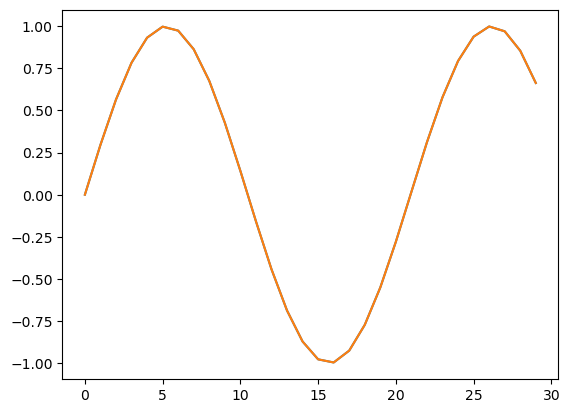

In [121]:
# Plot patha norm
plt.plot(patha)

In [122]:
x, cost = b.compute_local_costs_non_interpolated(actual_path, 3, 1)

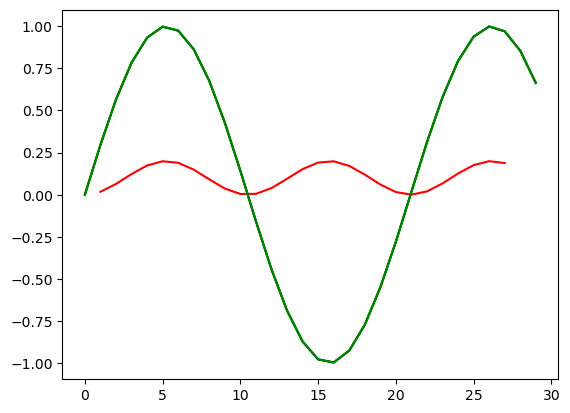

In [123]:

plt.plot(x, cost, c='r')
plt.plot(pathb, c='g')

In [47]:
# Interpolate x and cost
x = np.linspace(0, 29, 30)
cost = np.interp(x, x, cost)
plt.plot(x, cost, c='g')

ValueError: fp and xp are not of the same length.